<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Agentic_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup API key properly

In [2]:
import os
from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

# Install required packages

In [2]:
!pip install -U langchain langgraph langchain-tavily langchain-groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 18.0 MB/s eta 0:00:00


In [5]:
from langchain_groq import ChatGroq
from langchain_tavily import TavilySearch
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
from langchain_core.tools import tool

In [6]:
search = TavilySearch()
search.invoke("What is current USD vs INR price")

{'query': 'What is current USD vs INR price',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://wise.com/us/currency-converter/usd-to-inr-rate',
   'title': 'US dollars to Indian rupees Exchange Rate. Convert USD/INR - Wise',
   'content': 'USD to INR exchange rates today ; 1 USD, 88.69 INR ; 5 USD, 443.43 INR ; 10 USD, 886.85 INR ; 20 USD, 1,773.70 INR.',
   'score': 0.98581,
   'raw_content': None},
  {'url': 'https://www.westernunion.com/us/en/currency-converter/usd-to-inr-rate.html',
   'title': 'USD to INR | Convert US Dollar to Indian Rupee - Western Union',
   'content': "Check today's USD to INR exchange rate with Western Union's currency converter. Send USD and your receiver will get INR in minutes.",
   'score': 0.98306,
   'raw_content': None},
  {'url': 'https://www.xe.com/en-us/currencyconverter/convert/?Amount=1&From=USD&To=INR',
   'title': '1 USD to INR - US Dollars to Indian Rupees Exchange Rate - Xe',
   'content': 'Get the la

In [8]:
search.invoke("What is temperature in Pune")

{'query': 'What is temperature in Pune',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://timesofindia.indiatimes.com/weather/pune-weather-forecast-today/411002',
   'title': 'Pune Weather Today, Pune Temperature Hourly and Weekly Forecast',
   'content': '* Pune Weather # Pune Weather Forecast26 Sep 2025 Today’s Weather in Pune: In Pune today, the weather is expected to be Cloudy with a maximum temperature of 28°C and a minimum of 22°C. For more, explore TOI Weather News for updates and forecasts on Pune weather. * ##### 1.What is the weather like in Pune today? + The weather in Pune today is Cloudy with a high of 28°C and a low of 22°C. Chennai weather update: Warm day with patchy rain and moderate air quality Mumbai weather update: Mild, humid day with rain and moderate air quality expected',
   'score': 0.77731717,
   'raw_content': None},
  {'url': 'https://www.wunderground.com/forecast/in/pune',
   'title': 'Pune, India 10-Day Weather Fo

# Tool to calculate EMI

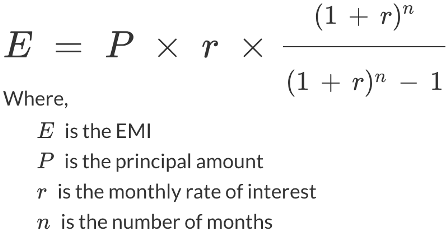

In [7]:
@tool
def calculate_emi(p: str, n: str, r: str) -> dict[str, float]:
  """
  Inputs :
  p: principal in INR
  n: Number of years
  r: rate of interest in %p.a.
  Outputs :
  A dictionary containing emi, amount and interest
  """
  p = float(p)
  n = float(n)
  r = float(r)
  n = n*12
  r = r/1200
  x = (1 + r)**n
  emi = (p * r * x) / (x - 1)
  amt = emi * n
  interest = amt - p
  return {"emi": emi, "amount": amt, "interest": interest}

# Get the model

In [10]:
model = ChatGroq(model="llama-3.3-70b-versatile")
model.invoke("Hello How are you!")

AIMessage(content="Hello. I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help with any questions or topics you'd like to discuss. How about you? How's your day going so far?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 40, 'total_tokens': 94, 'completion_time': 0.112882841, 'prompt_time': 0.00172856, 'queue_time': 0.191109285, 'total_time': 0.114611401}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--bfa235cd-61fa-4dff-a6ef-bbafe4b8e66b-0', usage_metadata={'input_tokens': 40, 'output_tokens': 54, 'total_tokens': 94})

# Adding tools and createing react agent
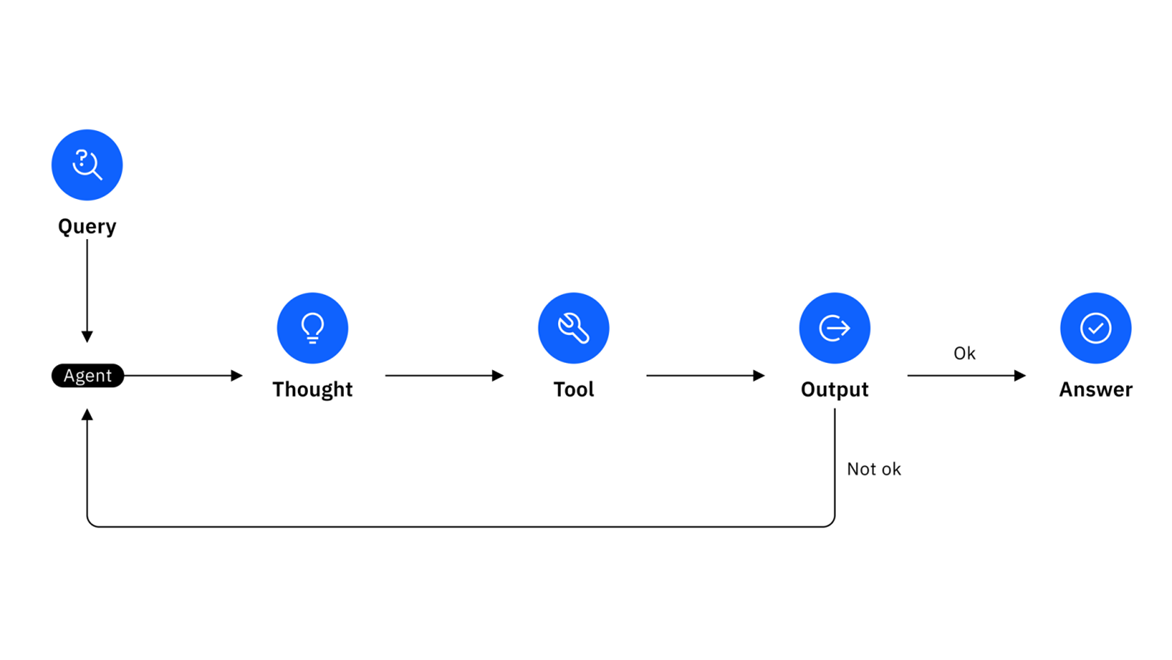

In [11]:
tools = [search, calculate_emi]
agent_executor = create_react_agent(model, tools, checkpointer=MemorySaver())

In [12]:
# Config is required for remembering past conversation
config = {"configurable": {"thread_id": "abc_123"}}

input_message = {
    "role": "user",
    "content": "Provide the weather forecast for this week in Pune"
}

for step in agent_executor.stream(
    {"messages": input_message}, config, stream_mode="values"
):
  step["messages"][-1].pretty_print()

================================ Human Message =================================

Provide the weather forecast for this week in Pune
================================== Ai Message ==================================
Tool Calls:
  tavily_search (eq428pebc)
 Call ID: eq428pebc
  Args:
    query: Pune weather forecast this week
    time_range: week
    topic: general
================================= Tool Message =================================
Name: tavily_search

{"query": "Pune weather forecast this week", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Weather in Pune, India", "url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Pune', 'region': 'Maharashtra', 'country': 'India', 'lat': 18.5333, 'lon': 73.8667, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1758977029, 'localtime': '2025-09-27 18:13'}, 'current': {'last_updated_epoch': 1758976200, 'last_updated': '2025-09-27 18:00', 'temp_c': 21.6, 'temp_f': 71.0, 'is_day': 1, 'condit

In [13]:
def ai_agent(query: str, thread_id: str):
  config = {"configurable": {"thread_id": thread_id}}
  input_message = {
      "role": "user",
      "content": query
  }
  for step in agent_executor.stream(
      {"messages": input_message}, config, stream_mode="values"
  ):
    step["messages"][-1].pretty_print()

In [14]:
thread_id = "def456"
ai_agent("How is banking stocks sentiment in India", thread_id=thread_id)

================================ Human Message =================================

How is banking stocks sentiment in India
================================== Ai Message ==================================
Tool Calls:
  tavily_search (023wyvdpn)
 Call ID: 023wyvdpn
  Args:
    query: banking stocks sentiment in India
    topic: finance
================================= Tool Message =================================
Name: tavily_search

{"query": "banking stocks sentiment in India", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.forbes.com/advisor/in/investing/best-penny-stocks/", "title": "Best Penny Stocks To Buy Now In India September 2025", "content": "This consistent financial performance, its strategic position in the banking sector, and its efforts to restore investor confidence make YES Bank an intriguing choice for those looking to invest in penny stocks with significant growth prospects. Given its strategic initiatives and market posi

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.3-70b-versatile` in organization `org_01j0m200sgfj3bv6v54j9hemah` service tier `on_demand` on tokens per day (TPD): Limit 100000, Used 101931, Requested 1836. Please try again in 54m15.137s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

In [15]:
ai_agent(
    query = "Principal is 10_00_000 INR for 5 years. Rate of interest is 9% p.a, Calculate EMI",
    thread_id = thread_id
)

================================ Human Message =================================

Principal is 10_00_000 INR for 5 years. Rate of interest is 9% p.a, Calculate EMI


RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.3-70b-versatile` in organization `org_01j0m200sgfj3bv6v54j9hemah` service tier `on_demand` on tokens per day (TPD): Limit 100000, Used 101487, Requested 1861. Please try again in 48m13.053999999s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

# Gemini model

In [21]:
!pip install -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.7.0 which is incompatible.


In [3]:
import os

os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
llm.invoke("What is 2+4")

AIMessage(content='2 + 4 = 6', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--2ced6232-469a-4d7a-adb3-6d8c04c50caf-0', usage_metadata={'input_tokens': 7, 'output_tokens': 35, 'total_tokens': 42, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 28}})

In [8]:
tools = [search, calculate_emi]
agent_executor = create_react_agent(llm, tools, checkpointer=MemorySaver())

In [9]:
def ai_agent(query: str, thread_id: str):
  config = {"configurable": {"thread_id": thread_id}}
  input_message = {
      "role": "user",
      "content": query
  }
  for step in agent_executor.stream(
      {"messages": input_message}, config, stream_mode="values"
  ):
    step["messages"][-1].pretty_print()

In [10]:
ai_agent("Principal 10_00_000 , Number of years 5 , rate of interest 8.1 Calulate EMI",
         thread_id="def456")

================================ Human Message =================================

Principal 10_00_000 , Number of years 5 , rate of interest 8.1 Calulate EMI
================================== Ai Message ==================================
Tool Calls:
  calculate_emi (615d1163-ea0d-48b5-8f69-4c71c6ad7aec)
 Call ID: 615d1163-ea0d-48b5-8f69-4c71c6ad7aec
  Args:
    r: 8.1
    n: 5
    p: 1000000
================================= Tool Message =================================
Name: calculate_emi

{"emi": 20324.28652922556, "amount": 1219457.1917535337, "interest": 219457.19175353367}
================================== Ai Message ==================================

Your EMI will be 20,324.29. The total amount payable will be 1,219,457.19, with a total interest of 219,457.19.


In [11]:
ai_agent("How is sentiment for banking stocks in India",
         thread_id="def456")

================================ Human Message =================================

How is sentiment for banking stocks in India
================================== Ai Message ==================================
Tool Calls:
  tavily_search (4a287424-a5ed-40cc-ab2b-ed982596182b)
 Call ID: 4a287424-a5ed-40cc-ab2b-ed982596182b
  Args:
    query: Sentiment for banking stocks in India
    topic: finance
================================= Tool Message =================================
Name: tavily_search

{"query": "Sentiment for banking stocks in India", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.forbes.com/advisor/in/investing/stock-market-outlook/", "title": "India Stock Market Outlook For November (2025)", "content": "On the eve of Diwali trading, the Indian stock market indices experienced a positive uptick, reflecting a generally optimistic sentiment among", "score": 0.83452857, "raw_content": null}, {"url": "https://www.forbes.com/advisor/in

In [12]:
ai_agent("Vonvert 100 USD to INR as per latest rates",
         thread_id="def456")

================================ Human Message =================================

Vonvert 100 USD to INR as per latest rates
================================== Ai Message ==================================
Tool Calls:
  tavily_search (6d508ad9-f0be-4429-b638-1521d845479d)
 Call ID: 6d508ad9-f0be-4429-b638-1521d845479d
  Args:
    query: 100 USD to INR latest rates
================================= Tool Message =================================
Name: tavily_search

{"query": "100 USD to INR latest rates", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.xe.com/en-us/currencyconverter/convert/?Amount=100&From=USD&To=INR", "title": "100 USD to INR - US Dollars to Indian Rupees Exchange Rate - Xe", "content": "100.00 US Dollar = 8,867.0899 Indian Rupee. 1 USD = 88.6709 INR. 1 INR = 0.0112777 USD. US Dollar to Indian Rupee conversion — Last updated Sep 27, 2025, 04:18", "score": 0.92491204, "raw_content": null}, {"url": "https://www.makemytrip.com/